# Synthentic data
> Synthethic data work by Jorge

- toc: true 
- badges: true
- comments: true
- categories: [jupyter, collab]
- image: images/chart-preview.png
- author: Jorge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import random as rd

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

path = 'C:/Users/ML/PycharmProjects/fastai/data/'

In [2]:
# read data
train_df = pd.read_csv(path + 'train.csv', low_memory=False)
test_df = pd.read_csv(path + 'test.csv', low_memory=False)

In [3]:
train_df

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  ...  \
0                 1          2013-08-16                     0      B  ...   
1                 2          2014-04-22                     0      F  ...   
2                 4          2014-08-25                     0      F  ...   
3                 6          2013-04-15                     0      J  ...   
4                 8          2014-01-25                     0      E  ...   
...             ...                 ...                   ...    ...  ...   
260748       434584          2013-05-16                     0      J  ...   
260749       434585          2014-12-07                     0      J  ...   
260750       434586          2014-02-18                     0      F  ...   
260751       434587          2014-04-08                     0      F  ...   
260752       434588          2013-03-19                     0      F  ...   

        GeographicField62A  GeographicField62B  GeographicField63  \
0                       -1                  10                  N   
1                       -1                  20                  N   
2                       -1                   8                  N   
3                       -1                  21                  N   
4                       -1                  12                  N   
...                    ...                 ...                ...   
260748                  -1                   8                  N   
260749                  -1                  20                  N   
260750                  -1                   8                  N   
260751                  -1                  16                  N   
260752                  -1                   8                  N   

       GeographicField64  
0                     CA  
1                     NJ  
2                     NJ  
3                     TX  
4                     IL  
...                  ...  
260748                TX  
260749                TX  
260750                NJ  
260751                NJ  
260752                NJ  

[260753 rows x 299 columns]

In [4]:
train_df.head()

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  ...  \
0            1          2013-08-16                     0      B  ...   
1            2          2014-04-22                     0      F  ...   
2            4          2014-08-25                     0      F  ...   
3            6          2013-04-15                     0      J  ...   
4            8          2014-01-25                     0      E  ...   

   GeographicField62A  GeographicField62B  GeographicField63 GeographicField64  
0                  -1                  10                  N                CA  
1                  -1                  20                  N                NJ  
2                  -1                   8                  N                NJ  
3                  -1                  21                  N                TX  
4                  -1                  12                  N                IL  

[5 rows x 299 columns]

#### Check if there are NaN values

In [5]:
nan_validation = train_df.isna().sum()>0
nan_validation

QuoteNumber             False
Original_Quote_Date     False
QuoteConversion_Flag    False
Field6                  False
Field7                  False
                        ...  
GeographicField61B      False
GeographicField62A      False
GeographicField62B      False
GeographicField63       False
GeographicField64       False
Length: 299, dtype: bool

In [6]:
nan_validation.unique()

array([False,  True])

In [7]:
train_df.isna().sum()[train_df.isna().sum() > 0].index

Index(['PersonalField7', 'PersonalField84', 'PropertyField3', 'PropertyField4',
       'PropertyField29', 'PropertyField32', 'PropertyField34',
       'PropertyField36', 'PropertyField38'],
      dtype='object')

In [8]:
train_df.PersonalField7.unique()

array(['N', 'Y', nan], dtype=object)

In [9]:
train_df.PersonalField7.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
260748    False
260749    False
260750    False
260751    False
260752    False
Name: PersonalField7, Length: 260753, dtype: bool

In [10]:
train_df.PersonalField7.isna().unique()

array([False,  True])

In [11]:
# Just to see what happens if we delete the rows with missing data
train_df.dropna(subset=['PersonalField7', 'PersonalField84', 'PropertyField3', 'PropertyField4', 'PropertyField29',
                         'PropertyField32', 'PropertyField34', 'PropertyField36', 'PropertyField38'], inplace=False)

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  ...  \
0                 1          2013-08-16                     0      B  ...   
4                 8          2014-01-25                     0      E  ...   
6                13          2013-11-01                     0      J  ...   
11               22          2013-06-11                     0      B  ...   
19               37          2013-06-18                     0      E  ...   
...             ...                 ...                   ...    ...  ...   
260737       434569          2014-03-10                     0      E  ...   
260738       434571          2014-04-11                     0      E  ...   
260743       434579          2013-05-02                     0      B  ...   
260744       434580          2013-10-28                     0      F  ...   
260748       434584          2013-05-16                     0      J  ...   

        GeographicField62A  GeographicField62B  GeographicField63  \
0                       -1                  10                  N   
4                       -1                  12                  N   
6                       -1                   8                  N   
11                      -1                   8                  N   
19                      -1                   8                  N   
...                    ...                 ...                ...   
260737                  -1                  25                  N   
260738                  -1                  10                  N   
260743                  -1                  17                  N   
260744                  -1                  19                  N   
260748                  -1                   8                  N   

       GeographicField64  
0                     CA  
4                     IL  
6                     TX  
11                    CA  
19                    IL  
...                  ...  
260737                IL  
260738                IL  
260743                CA  
260744                NJ  
260748                TX  

[55242 rows x 299 columns]

In [12]:
cols_to_delete = train_df.isna().sum()[train_df.isna().sum() > 0].index

def drop_cols_from_list(df,cols_to_delete):
    df.drop(cols_to_delete,axis=1,inplace=True)
    return df

train_df1 = drop_cols_from_list(train_df,cols_to_delete)
test_df1 = drop_cols_from_list(test_df,cols_to_delete)

In [13]:
train_df1

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  ...  \
0                 1          2013-08-16                     0      B  ...   
1                 2          2014-04-22                     0      F  ...   
2                 4          2014-08-25                     0      F  ...   
3                 6          2013-04-15                     0      J  ...   
4                 8          2014-01-25                     0      E  ...   
...             ...                 ...                   ...    ...  ...   
260748       434584          2013-05-16                     0      J  ...   
260749       434585          2014-12-07                     0      J  ...   
260750       434586          2014-02-18                     0      F  ...   
260751       434587          2014-04-08                     0      F  ...   
260752       434588          2013-03-19                     0      F  ...   

        GeographicField62A  GeographicField62B  GeographicField63  \
0                       -1                  10                  N   
1                       -1                  20                  N   
2                       -1                   8                  N   
3                       -1                  21                  N   
4                       -1                  12                  N   
...                    ...                 ...                ...   
260748                  -1                   8                  N   
260749                  -1                  20                  N   
260750                  -1                   8                  N   
260751                  -1                  16                  N   
260752                  -1                   8                  N   

       GeographicField64  
0                     CA  
1                     NJ  
2                     NJ  
3                     TX  
4                     IL  
...                  ...  
260748                TX  
260749                TX  
260750                NJ  
260751                NJ  
260752                NJ  

[260753 rows x 290 columns]

In [14]:
train_df1.head(1)

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  ...  \
0            1          2013-08-16                     0      B  ...   

   GeographicField62A  GeographicField62B  GeographicField63 GeographicField64  
0                  -1                  10                  N                CA  

[1 rows x 290 columns]

In [15]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 290 entries, QuoteNumber to GeographicField64
dtypes: float64(4), int64(265), object(21)
memory usage: 576.9+ MB


In [16]:
test_df1.head(1)

QuoteNumber Original_Quote_Date Field6  Field7  ...  GeographicField62A  \
0            3          2014-08-12      E      16  ...                  -1   

   GeographicField62B GeographicField63  GeographicField64  
0                  25                 Y                 IL  

[1 rows x 289 columns]

In [17]:
vld = train_df1.isna().sum()>0
vld.unique()

array([False])

In [18]:
train_df._get_numeric_data().columns

Index(['QuoteNumber', 'QuoteConversion_Flag', 'Field7', 'Field8', 'Field9',
       'Field11', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A',
       'CoverageField2B',
       ...
       'GeographicField58A', 'GeographicField58B', 'GeographicField59A',
       'GeographicField59B', 'GeographicField60A', 'GeographicField60B',
       'GeographicField61A', 'GeographicField61B', 'GeographicField62A',
       'GeographicField62B'],
      dtype='object', length=269)

In [19]:
cols_to_drop = []

for i in set(train_df.columns) - set(train_df._get_numeric_data().columns):
    if (train_df.loc[:,i].nunique() >= 3):
        cols_to_drop.append(i)
        
train_df = drop_cols_from_list(train_df,cols_to_drop)
test_df = drop_cols_from_list(test_df,cols_to_drop)

In [20]:
cls_to_encode = set(train_df.columns) - set(train_df._get_numeric_data().columns)

def ohe(df,cls_to_encode):
    df = pd.get_dummies(df,columns=cls_to_encode,drop_first=True)
    return df

train_df = ohe(train_df,cls_to_encode)
test_df = ohe(test_df,cls_to_encode)

In [21]:
test_df.drop(list(set(test_df.columns) - set(train_df.columns)),axis=1,inplace=True)

In [22]:
train_df

QuoteNumber  QuoteConversion_Flag  Field7  Field8  ...  \
0                 1                     0      23  0.9403  ...   
1                 2                     0       7  1.0006  ...   
2                 4                     0       7  1.0006  ...   
3                 6                     0      10  0.9769  ...   
4                 8                     0      23  0.9472  ...   
...             ...                   ...     ...     ...  ...   
260748       434584                     0      23  0.9691  ...   
260749       434585                     0      26  0.8870  ...   
260750       434586                     0      11  0.9685  ...   
260751       434587                     0       7  1.0006  ...   
260752       434588                     0      15  0.8945  ...   

        PropertyField30_Y  PropertyField37_Y  Field12_Y  PropertyField5_Y  
0                       0                  0          0                 1  
1                       0                  0          0                 1  
2                       0                  0          0                 1  
3                       0                  1          0                 1  
4                       0                  0          0                 1  
...                   ...                ...        ...               ...  
260748                  0                  0          0                 1  
260749                  0                  1          0                 1  
260750                  0                  1          0                 1  
260751                  0                  0          0                 1  
260752                  0                  0          0                 1  

[260753 rows x 273 columns]

In [23]:
labels = train_df.QuoteConversion_Flag.value_counts()
labels

0    211859
1     48894
Name: QuoteConversion_Flag, dtype: int64

Text(0.5, 1.0, '2-class label distribution')

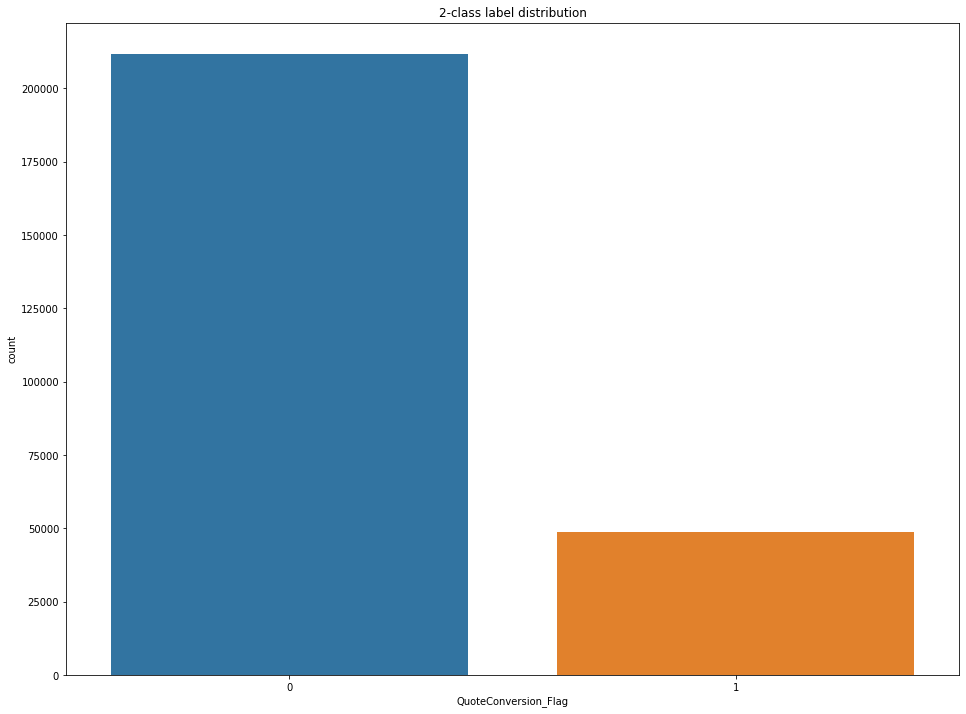

In [24]:
# visualise label dist
fig5, ax5 = plt.subplots(figsize=(16,12))
sns.countplot(data = train_df, x='QuoteConversion_Flag').set_title("2-class label distribution")

#### Train data profile 

In [25]:
# train_df.profile_report()

#### Test data profile 

In [26]:
# test_df.profile_report()

# Data augmentation with CTGAN

In [27]:
# As the data has already been encoded, we might continue with the synthetic data generation without specifying
# the cathegorical columns

from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

# Initiate the CTGANSynthesizer and call its fit method to pass in the table
ctgan = CTGANSynthesizer(epochs=80)
ctgan.fit(train_df)

#generate synthetic data, 1000 rows of data
synthetic_data = ctgan.sample(200000)

c:\users\ml\.conda\envs\ctgan\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
c:\users\ml\.conda\envs\ctgan\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\users\ml\.conda\envs\ctgan\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
c:\users\ml\.conda\envs\ctgan\lib\site-packages\sklearn\mixture\_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate po

In [28]:
synthetic_data

QuoteNumber  QuoteConversion_Flag  Field7    Field8  ...  \
0             58475                     0      14  0.919014  ...   
1            283439                     0      16  0.979751  ...   
2            329449                     0       6  0.887974  ...   
3            102468                     0       0  0.914928  ...   
4            179776                     0       2  1.009825  ...   
...             ...                   ...     ...       ...  ...   
199995        58471                     1      24  0.888249  ...   
199996       122615                     1       7  0.884400  ...   
199997        99632                     0      26  1.001284  ...   
199998       387518                     1      14  0.940138  ...   
199999        67670                     0      15  0.938704  ...   

        PropertyField30_Y  PropertyField37_Y  Field12_Y  PropertyField5_Y  
0                       0                  0          1                 1  
1                       0                  0          0                 1  
2                       0                  1          0                 0  
3                       0                  0          0                 0  
4                       0                  0          0                 0  
...                   ...                ...        ...               ...  
199995                  0                  0          1                 1  
199996                  0                  0          0                 1  
199997                  0                  0          0                 0  
199998                  1                  0          0                 0  
199999                  0                  1          1                 0  

[200000 rows x 273 columns]

In [48]:
ctgan.save('HQC_ctgan_model.pkl')

In [31]:
synthetic_data.to_pickle("synthetic_data.pkl")

In [32]:
synthetic_data.to_csv("synthetic_data.csv", index=False)

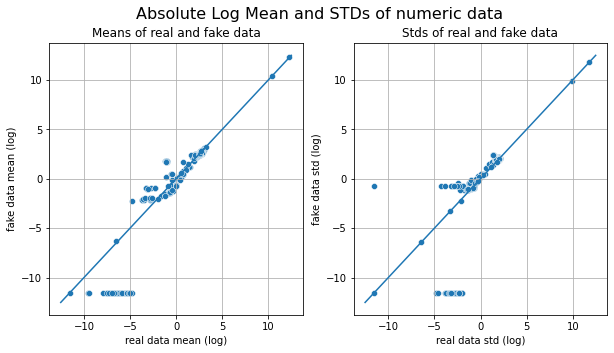

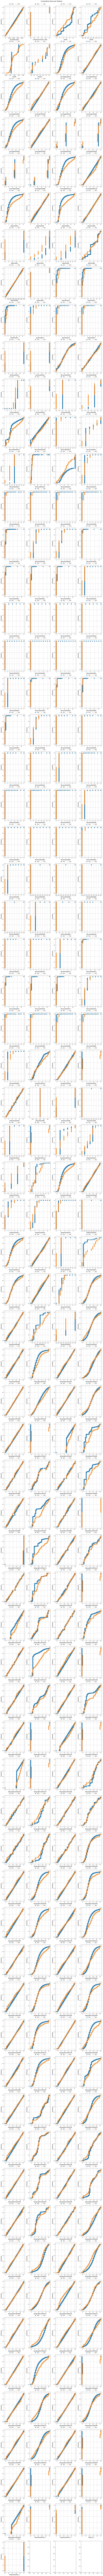

c:\users\ml\.conda\envs\ctgan\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ml\.conda\envs\ctgan\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ml\.conda\envs\ctgan\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

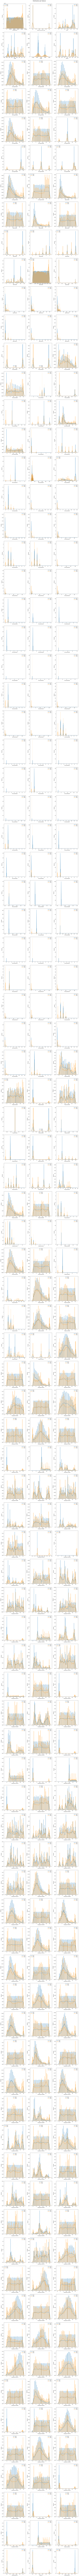

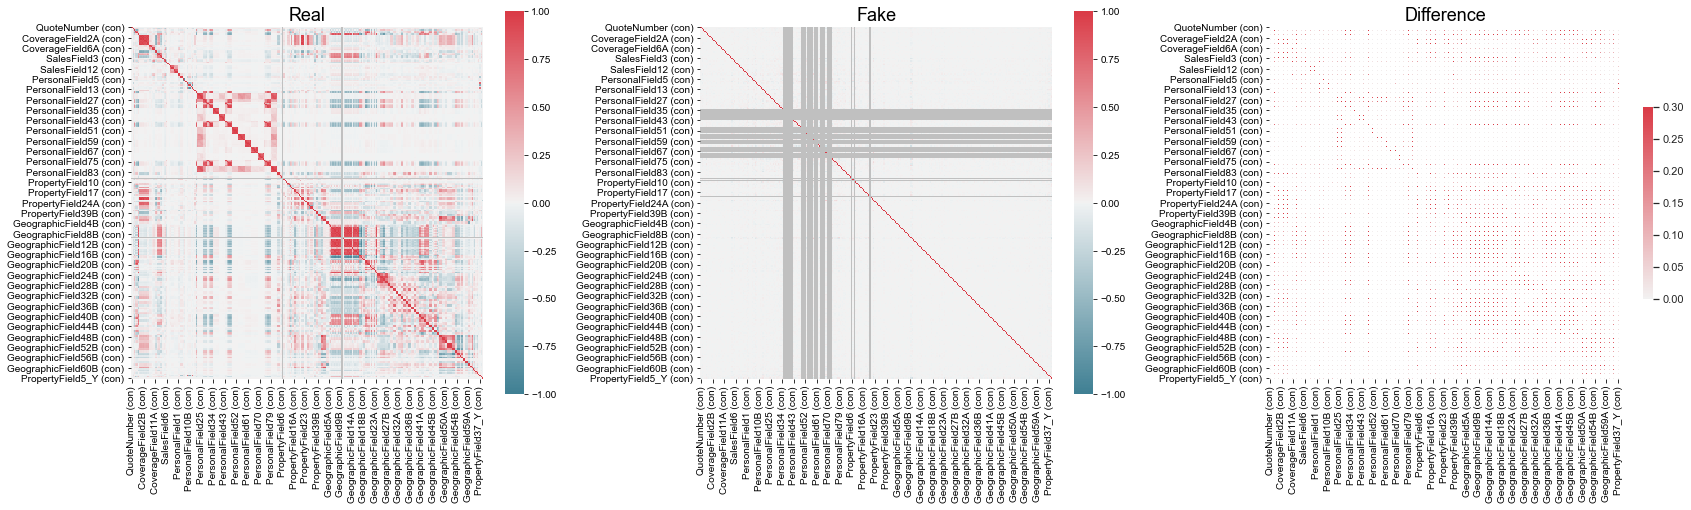

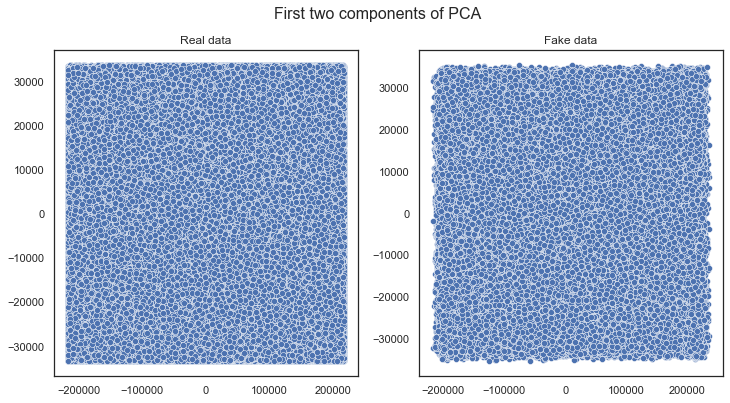

In [34]:
from table_evaluator import load_data, TableEvaluator

table_evaluator = TableEvaluator(train_df, synthetic_data)
table_evaluator.visual_evaluation()

### Label distribution

In [49]:
labels = synthetic_data.QuoteConversion_Flag.value_counts()
labels

0    165326
1     34674
Name: QuoteConversion_Flag, dtype: int64

Text(0.5, 1.0, '2-class label distribution')

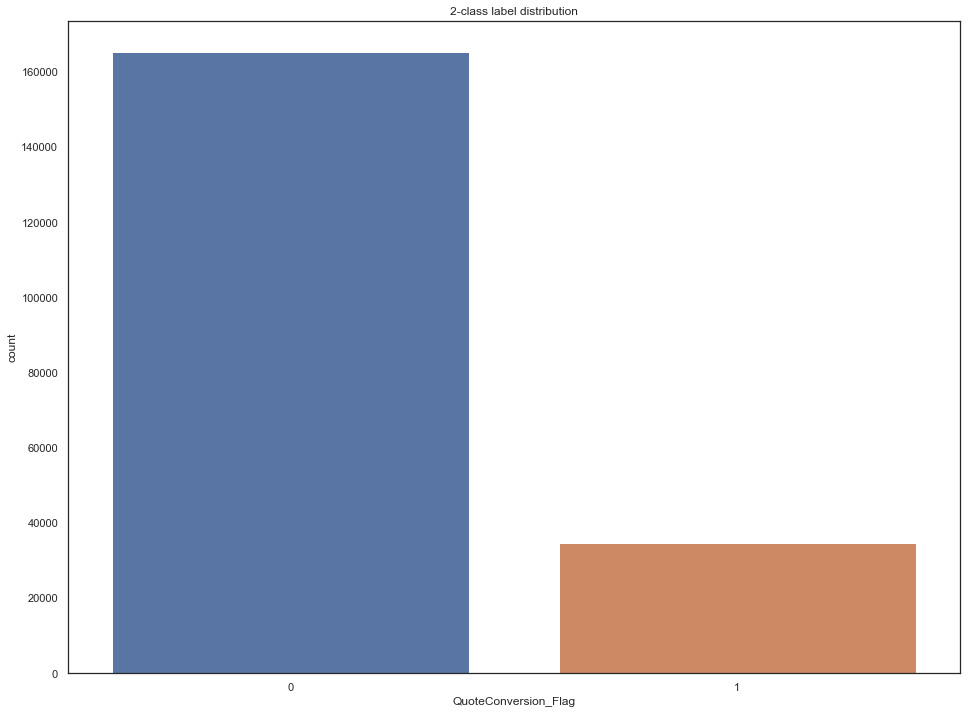

In [50]:
# visualise label dist
fig5, ax5 = plt.subplots(figsize=(16,12))
sns.countplot(data = synthetic_data, x='QuoteConversion_Flag').set_title("2-class label distribution")

### Synthetic data evaluation

#### Statistical evaluation

In [ ]:
# tbd

#### Likelihood metrics

In [ ]:
# tbd